# **Auto MPG - UC Irvine Machine Learning Repository**

Conjunto de datos proporcionados por la biblioteca **CMU StatLib**, disponibles para su uso con fines didácticos y de formación.
Los datos se refieren al consumo de combustible de vehículos en ciudades en **millas por galón (MPG)**.

Link: https://archive.ics.uci.edu/dataset/9/auto+mpg

### Variables

* **mpg**: numérico continuo (Target)
* **cylinders**: numérico entero (Feature)
* **displacement**: numérico continuo (Feature)
* **horsepower**: numérico continuo (Feature)
* **weight**: numérico continuo (Feature)
* **acceleration**: numérico continuo (Feature)
* **model_year**: numérico entero (Feature)
* **origin**: numérico entero (Feature)
* **car_name**:	cualitativa categórica (ID)

In [ ]:
#@title Cargamos las dependencias

# data
import numpy as np
import pandas as pd

# machine learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# @title Cargamos el dataset

from google.colab import drive
drive.mount('/content/drive')

# Abriendo el archivo en bloc de notas, observamos que no tiene encabezados en
# las columnas, por lo que se los agregamos usando los nombres de las variables

column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

file_path = '/content/drive/My Drive/Estadistica_y_programacion/auto-mpg.data.txt'
dataset = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)

Mounted at /content/drive


In [ ]:
# @title Corroboramos que se haya cargado correctamente

dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# @title Comenzamos el EDA. Vemos la cantidad de filas y columnas del dataset

dataset.shape

(398, 9)

In [ ]:
# @title Información sobre el tipo de datos y cantidad de registros no nulos por columna

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Observamos que al importar los datos la variable **horsepower** aparece como **object**, cuando debería ser un valor numérico continuo.

Vamos a rectificar el tipo de dato antes de continuar.

In [ ]:
# Convertimos horsepower a numeric (float)
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')

# Verificamos los tipos de datos después de las conversiones
print(dataset.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [ ]:
# Volvemos a correr info() para verificar si al cambiar el tipo de dato de esas
# columnas existían valores no numéricos que se convirtieron en NaN

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Vemos que **horsepower** contenía 6 datos no numéricos, por eso Python lo tomaba como object.

Al forzar el cambio del tipo de dato, quedaron como NaN.

Teniendo en cuenta que son solamente 6 registros, optamos por eliminar toda la fila.

In [ ]:
dataset = dataset.dropna(subset=['horsepower'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [ ]:
# @title Información estadística descriptiva para columnas con datos numéricos

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [ ]:
#@title Evaluamos la presencia de valores atípicos

# Iniciamos un diccionario vacío
outliers_dict = {}

# Calculamos los outliers para cada columna numérica
for column in dataset.select_dtypes(include=['float64']).columns:
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtramos los valores que están fuera del rango para cada columna
    outliers_column = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    outliers_dict[column] = outliers_column[column]

# Mostramos los outliers por columna
for col, outliers in outliers_dict.items():
    print(f"Outliers en la columna '{col}':")
    print(outliers)
    print("\n")

Outliers en la columna 'mpg':
Series([], Name: mpg, dtype: float64)


Outliers en la columna 'displacement':
Series([], Name: displacement, dtype: float64)


Outliers en la columna 'horsepower':
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
67     208.0
94     215.0
95     225.0
116    230.0
Name: horsepower, dtype: float64


Outliers en la columna 'weight':
Series([], Name: weight, dtype: float64)


Outliers en la columna 'acceleration':
7       8.5
9       8.5
11      8.0
59     23.5
195    22.2
196    22.1
209    21.9
299    24.8
300    22.2
326    23.7
394    24.6
Name: acceleration, dtype: float64




Comprobamos que hay dos atributos que presentan unos pocos outliers: **horsepower** y **acceleration**.

Decidimos tratarlos usando la técnica de **recorte** (**clipping**), que consiste en asignarles el valor del límite (superior o inferior, según correponda) dentro del rango que nos interesa mantener.

Los límites serán:
* **q1 - 1.5 * iqr**  Límite inferior
* **q3 + 1.5 * iqr**  Límite superior

In [ ]:
#@title Tratamiento de outliers para variable Horsepower

# Calcular el IQR y el límite superior para la columna 'horsepower'
q1 = dataset['horsepower'].quantile(0.25)
q3 = dataset['horsepower'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
print(f'Límite superior: {upper_limit}')

# Reemplazar los valores que exceden el límite superior por el valor del límite
dataset.loc[dataset['horsepower'] > upper_limit, 'horsepower'] = upper_limit

# Verificar si los outliers han sido reemplazados
print(dataset['horsepower'].describe())

Límite superior: 202.5
count    392.000000
mean     104.053571
std       37.304696
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      202.500000
Name: horsepower, dtype: float64


In [ ]:
#@title Tratamiento de outliers para variable Acceleration

# Calcular el IQR y el límite superior para la columna 'acceleration'
q1 = dataset['acceleration'].quantile(0.25)
q3 = dataset['acceleration'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
print(f'Límite inferior: {lower_limit}')
upper_limit = q3 + 1.5 * iqr
print(f'Límite superior: {upper_limit}')

# Reemplazar los valores que exceden el límite superior por el valor del límite
dataset['acceleration'] = dataset['acceleration'].apply(
    lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x)
)

# Verificar si los outliers han sido reemplazados
print(dataset['acceleration'].describe())

Límite inferior: 8.900000000000002
Límite superior: 21.899999999999995
count    392.000000
mean      15.520663
std        2.678799
min        8.900000
25%       13.775000
50%       15.500000
75%       17.025000
max       21.900000
Name: acceleration, dtype: float64


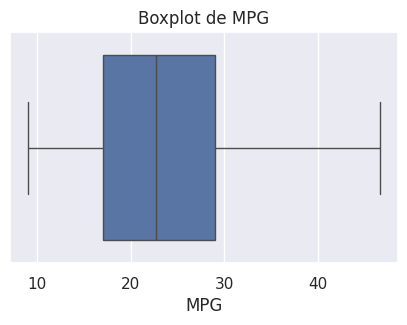

In [ ]:
#@title Ahondamos en la distribución de la variable a predecir (mpg)

# Creamos el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(data=dataset, x='mpg')

# Agregamos título y etiquetas
plt.title('Boxplot de MPG')
plt.xlabel('MPG')

# Mostramos el gráfico
plt.show()

La variable **mpg** muestra una **distribución aproximadamente normal**, con una leve asimetría a derecha: la mediana está más cerca de la parte inferior de la caja y el bigote es más largo en el extremo superior de la caja.

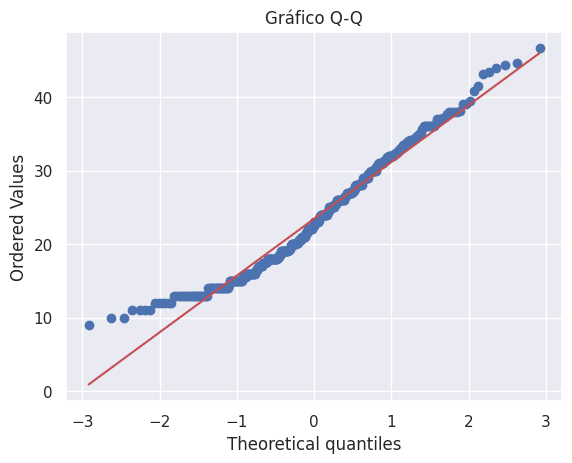

In [ ]:
#@title Comprobación de la normalidad de mpg usando Gráfico Q-Q

import scipy.stats as stats

stats.probplot(dataset['mpg'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

El **gráfico Q-Q** compara los cuantiles de la variable contra los cuantiles de una distribución normal teórica.

Según vemos en el gráfico, si bien los puntos del extremo inferior se alejan un poco del cuantil teórico, el resto de los puntos se alinean bastante bien en una línea recta, lo cual corrobora que la variable sigue una **distribución normal**.

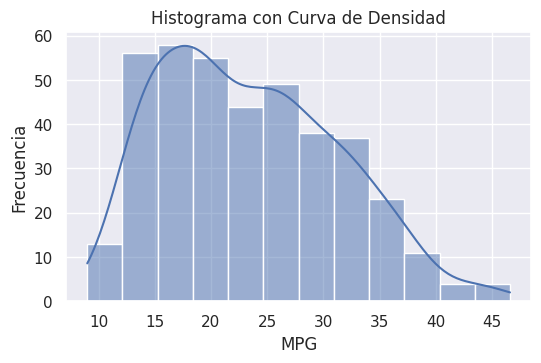

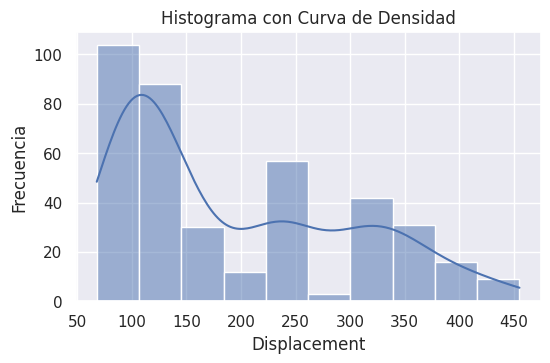

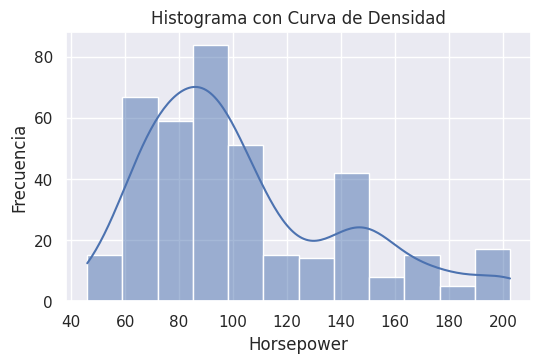

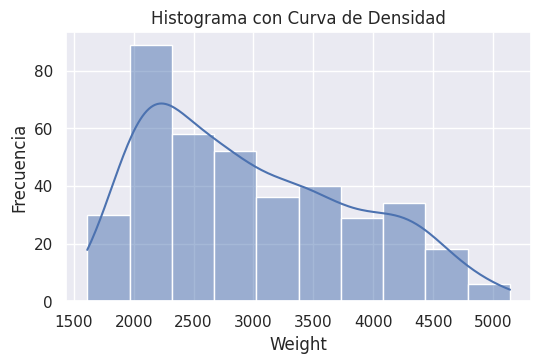

In [ ]:
#@title Verificamos la distribución del resto de las variables numéricas continuas que nos interesan

# MPG
plt.figure(figsize=(6, 3.5))
sns.histplot(dataset['mpg'], kde=True)  # kde=True agrega la curva de densidad
plt.title("Histograma con Curva de Densidad")
plt.xlabel("MPG")
plt.ylabel("Frecuencia")
plt.show()

# Displacement
plt.figure(figsize=(6, 3.5))
sns.histplot(dataset['displacement'], kde=True)
plt.title("Histograma con Curva de Densidad")
plt.xlabel("Displacement")
plt.ylabel("Frecuencia")
plt.show()

# Horsepower
plt.figure(figsize=(6, 3.5))
sns.histplot(dataset['horsepower'], kde=True)
plt.title("Histograma con Curva de Densidad")
plt.xlabel("Horsepower")
plt.ylabel("Frecuencia")
plt.show()

# Weight
plt.figure(figsize=(6, 3.5))
sns.histplot(dataset['weight'], kde=True)
plt.title("Histograma con Curva de Densidad")
plt.xlabel("Weight")
plt.ylabel("Frecuencia")
plt.show()

A diferencia de mpg, las variables **displacement**, **horsepower** y **weight** no siguen una distribución normal.

In [ ]:
#@title Generamos una Matriz de Correlación
# Usamos las features que nos interesan

training_df = dataset[["displacement", "horsepower", "weight", "acceleration",  "cylinders", "mpg"]]
training_df.corr()

,displacement,horsepower,weight,acceleration,cylinders,mpg
displacement,1.000000,0.900759,0.932994,-0.550003,0.950823,-0.805127
horsepower,0.900759,1.000000,0.874438,-0.696370,0.853232,-0.788856
weight,0.932994,0.874438,1.000000,-0.422834,0.897527,-0.832244
acceleration,-0.550003,-0.696370,-0.422834,1.000000,-0.509960,0.421393
cylinders,0.950823,0.853232,0.897527,-0.509960,1.000000,-0.777618
mpg,-0.805127,-0.788856,-0.832244,0.421393,-0.777618,1.000000


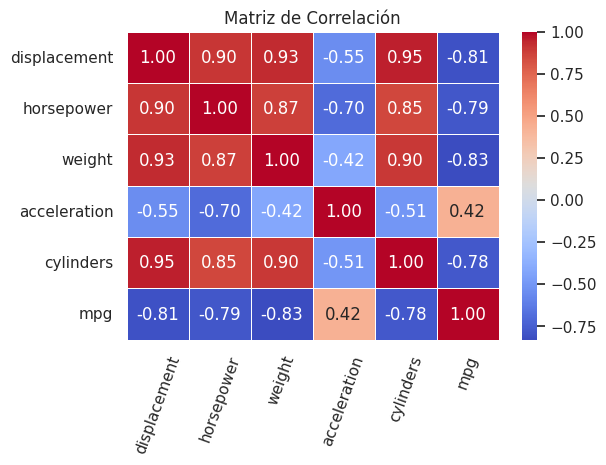

In [ ]:
#@title Graficamos la matriz de correlación

correlation_matrix = training_df.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Generamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=70)

# Mostramos el gráfico
plt.title('Matriz de Correlación')
plt.show()

Considerando a **MPG** como la variable target que queremos predecir, encontramos que tiene una alta correlación con las features:
* **Weight**: fuerte correlación negativa (a mayor peso del vehículo, consumirá más combustible y rendirá menos millas por galón)
* **Displacement**: fuerte correlación negativa (a mayor cilindrada del vehículo, consumirá más combustible y rendirá menos millas por galón)
* **Horsepower**: fuerte correlación negativa (a mayor potencia del motor, consumirá más combustible y rendirá menos millas por galón)
* **Cylinders**: fuerte correlación negativa (a mayor cantidad de cilindros, consumirá más combustible y rendirá menos millas por galón)

Las variables **Cylinders** y **Displacement** si bien no son exactamente lo mismo, se encuentran estrechamente relacionadas. Mientras que la primera refleja el número de cilindros que tiene un motor, la segunda marca el volumen total de los cilindros.

La cilindrada de un motor se mide en centímetros cúbicos o litros. Para calcularla, se multiplica el número de cilindros del motor por el volumen de cada cilindro. En resumen, es de esperar que a mayor cantidad de cilindros, la cilindrada también sea mayor y viceversa.

Para no sobredimensionar el aporte que esas variables hacen a **mpg**, nos quedaremos solamente con una de ellas, **displacement**, para continuar con el análisis del dataset y entrenamiento del modelo.

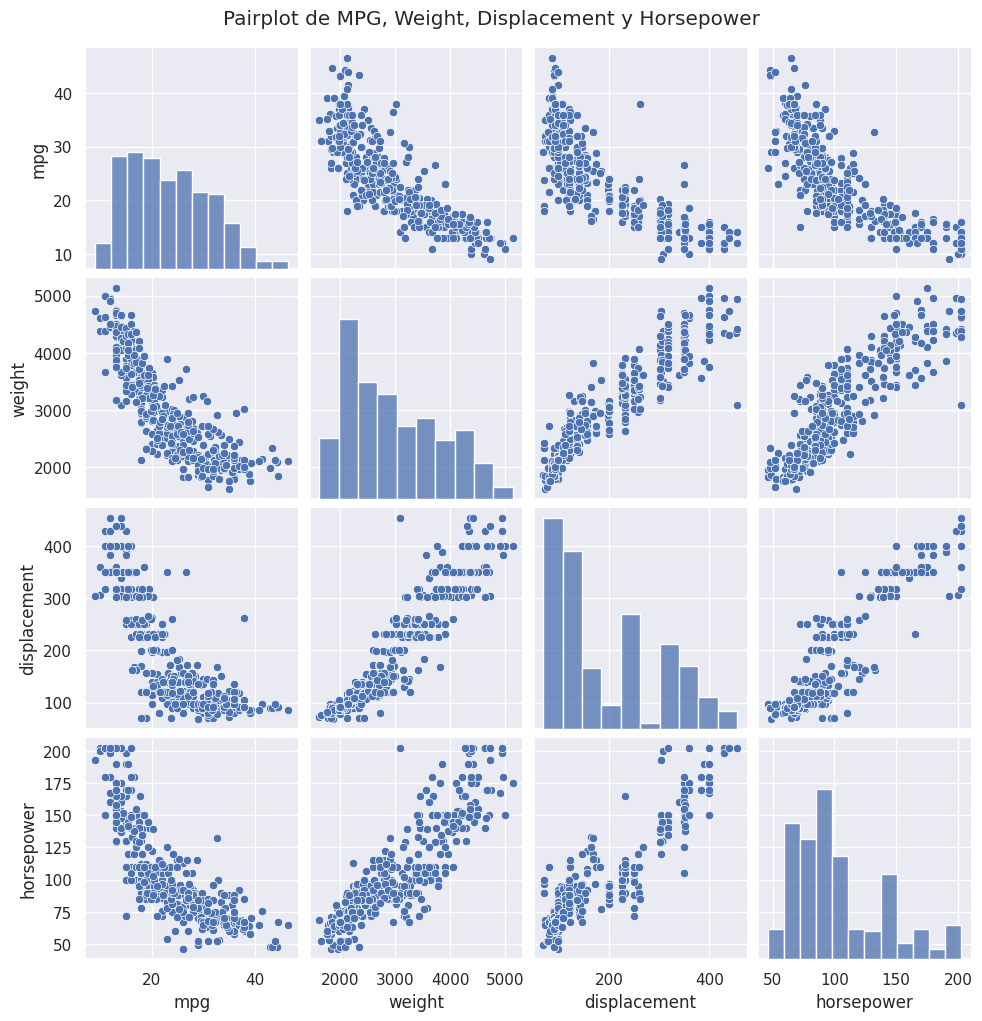

In [ ]:
#@title Graficamos pairplot de las variables con mayor correlación

sns.pairplot(dataset[['mpg', 'weight', 'displacement', 'horsepower']])
plt.suptitle('Pairplot de MPG, Weight, Displacement y Horsepower', y=1.02)
plt.show()

Vamos a probar usar **Regresión Linear Simple** para las 3 variables que nos interesan y luego comparar el desempeño con un modelo que utilice **Regresión Linear Múltiple**

In [ ]:
#@title X = Weight

# Definimos la variable predictora (X) y la variable objetivo (y)

X = dataset[['weight']]
y = dataset['mpg']

In [ ]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Definimos y entrenamos el modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

# Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 19.984956284921086
R-squared (R²): 0.6784674595879479


In [ ]:
#@title X = Displacement

# Definimos la variable predictora (X) y la variable objetivo (y)

X = dataset[['displacement']]
y = dataset['mpg']

In [ ]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Definimos y entrenamos el modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

# Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 19.909168111908812
R-squared (R²): 0.6796867949447237


In [ ]:
#@title X = Horsepower

# Definimos la variable predictora (X) y la variable objetivo (y)

X = dataset[['horsepower']]
y = dataset['mpg']

In [ ]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Definimos y entrenamos el modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

# Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 21.18775886862136
R-squared (R²): 0.6591158950992565


In [ ]:
#@title X = Weight, Displacement y Horsepower

# Definimos la variable predictora (X) y la variable objetivo (y)

X = dataset[['weight', 'displacement', 'horsepower']]
y = dataset['mpg']

In [ ]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Definimos y entrenamos el modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba

y_pred = model.predict(X_test)

# Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 18.54331683542669
R-squared (R²): 0.7016616056218778


In [ ]:
coeficiente = model.coef_
intercepto = model.intercept_

print(coeficiente)
print(intercepto)

[-0.00557631 -0.00294486 -0.0478601 ]
45.58194023035669


#### Conclusiones preliminares


**1. Error Cuadrático Medio (MSE)**

* En los modelos de regresión lineal simple, la variable displacement logró el MSE más bajo, seguida muy de cerca por la variable weight. Por su parte, horsepower presenta el mayor MSE de los tres modelos simples, lo que indica que al considerarlas individualmente es la que tiene una relación menos fuerte con mpg en comparación con weight y displacement.

* El MSE del modelo de regresión múltiple es aún menor, lo que confirma que combinar las tres variables mejora el modelo, ya que incorpora más factores relevantes para la predicción de mpg.

**2. Coeficiente de Determinación (R^2)**

* Los valores de R^2 para los modelos simples muestran que weight explica el 67.8% de la variabilidad en mpg, displacement explica el 68%, y horsepower el 65.9%. Esto indica que cada variable individual tiene una capacidad predictiva considerable.

* En el modelo múltiple, el R^2 es de 0.70166, lo que significa que el modelo explica el 70.17% de la variabilidad en mpg. Este valor superior de R^2 en el modelo múltiple indica que la combinación de las tres variables aporta una comprensión más completa de mpg que cualquiera de las variables por separado.

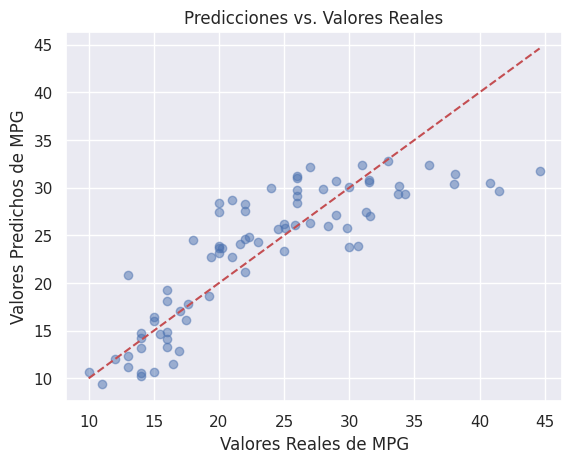

In [ ]:
#@title Comparación gráfica entre valores reales y valores predichos

# Supongamos que y_test son los valores reales y y_pred son los valores predichos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel("Valores Reales de MPG")
plt.ylabel("Valores Predichos de MPG")
plt.title("Predicciones vs. Valores Reales")
plt.show()